In [1]:
import cv2
import matplotlib.pyplot as plt

Original image shape: (1197, 1200, 3)


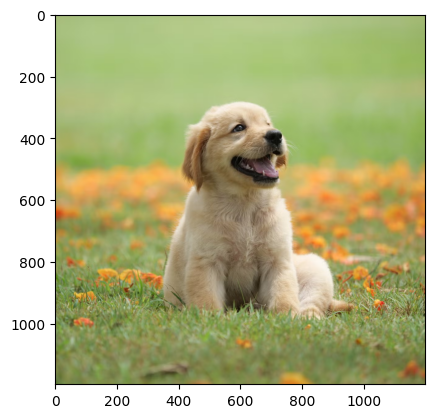

In [2]:
# Load the image using OpenCV (which loads images in BGR format)
bgr_image = cv2.imread("images/original_image.png")

# Convert BGR to RGB for correct color representation in Matplotlib
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image) # Display the image

# shape is in the format (height, width, channels)
print("Original image shape:", rgb_image.shape)

In [3]:
# Function: Show original images
def show_images(images, titles, cmap=None):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

### 4.1. Cắt một vùng hình ảnh bất kỳ

Original image shape: (1197, 1200, 3)
Cropped image shape: (400, 400, 3)


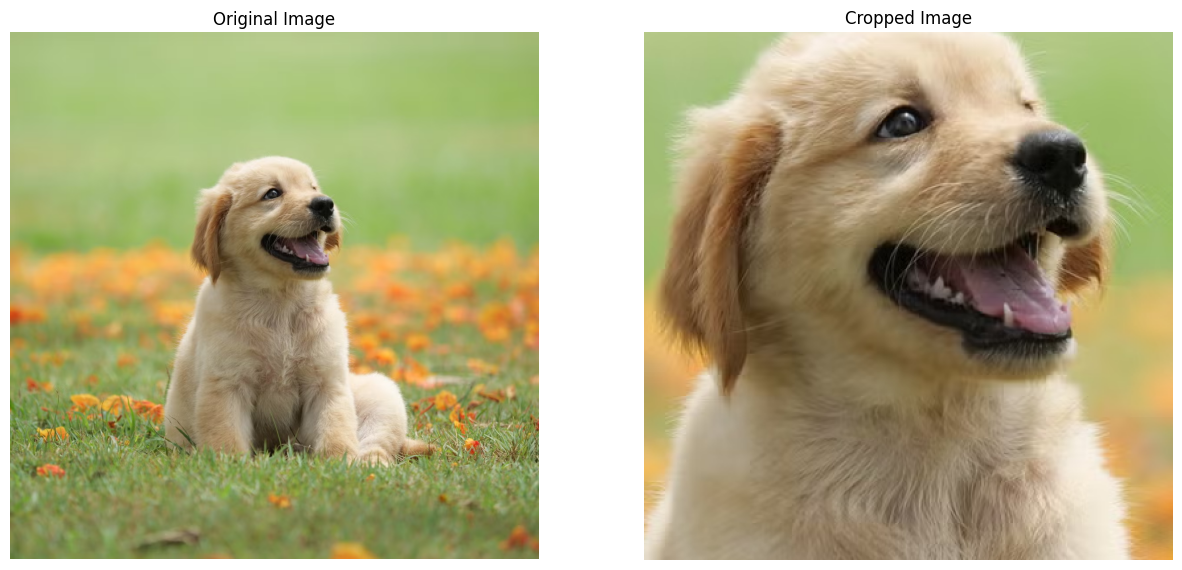

In [4]:
print("Original image shape:", rgb_image.shape)

# Crop the image (numpy slicing): TRỤC Y TRƯỚC - TRỤC X SAU (Height trước, Width sau)
x_start, y_start = 400, 300
x_end, y_end = 800, 700
cropped_image = rgb_image[y_start:y_end, x_start:x_end] # Crop vùng từ (y1:y2, x1:x2)
print("Cropped image shape:", cropped_image.shape)

# Display the original image and cropped image
titles = ['Original Image', 'Cropped Image']
images = [rgb_image, cropped_image]
show_images(images, titles)

(np.float64(-0.5), np.float64(1023.5), np.float64(558.5), np.float64(-0.5))

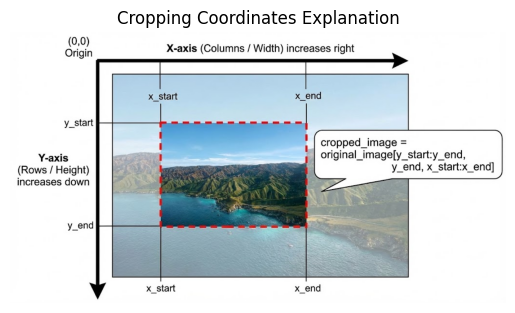

In [5]:
# Explain the cropping coordinates
explain_cropping = cv2.imread("images/explain_cropping.png")
explain_cropping_rgb = cv2.cvtColor(explain_cropping, cv2.COLOR_BGR2RGB)
plt.imshow(explain_cropping_rgb)
plt.title('Cropping Coordinates Explanation')
plt.axis('off')

### 4.2. Thay đổi kích thước hình ảnh theo tỷ lệ hoặc kích thước cố định

Original image shape: (1197, 1200, 3)


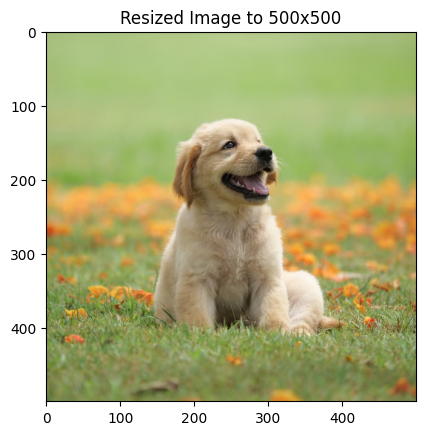

In [6]:
# Image resizing
new_width, new_height = 500, 500
resized_image = cv2.resize(rgb_image, (new_width, new_height))
plt.imshow(resized_image)
plt.title(f'Resized Image to {new_width}x{new_height}')

# shape is in the format (height, width, channels)
print("Original image shape:", rgb_image.shape)

Original image shape: (1197, 1200, 3)
Scaled image shape: (598, 600, 3)


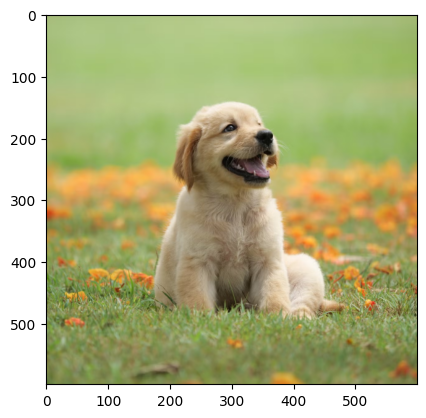

In [7]:
# Image scaling
scale_percent = 50
scale_width = int(rgb_image.shape[1] * scale_percent / 100)
scale_height = int(rgb_image.shape[0] * scale_percent / 100)
scaled_image = cv2.resize(rgb_image, (scale_width, scale_height), interpolation=cv2.INTER_AREA)

plt.imshow(scaled_image)
print("Original image shape:", rgb_image.shape)
print("Scaled image shape:", scaled_image.shape)

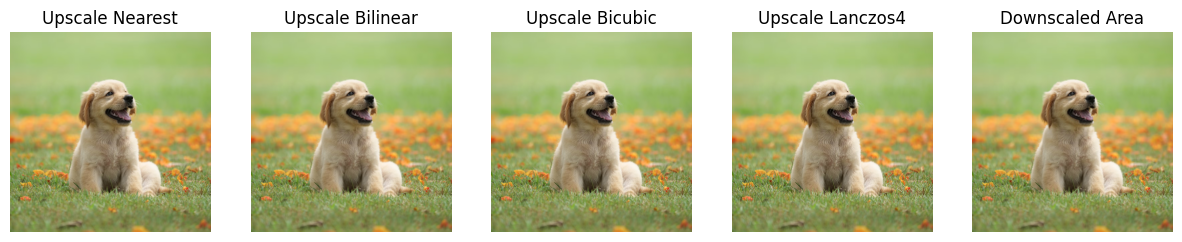

In [10]:
# Interpolation methods

# INTER NEAREST is fastest but lowest quality
upscale_nearest = cv2.resize(rgb_image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_NEAREST)

# INTER LINEAR is good for general purpose
upscale_bilinear = cv2.resize(rgb_image, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_LINEAR)

# INTER CUBIC is better quality but slower
upscale_bicubic = cv2.resize(rgb_image, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)

# INTER LANCZOS4 is high quality for upscaling
upscale_lanczos = cv2.resize(rgb_image, None, fx=3.0, fy=3.0, interpolation=cv2.INTER_LANCZOS4)

# INTER AREA is generally best for downscaling
downscaled = cv2.resize(rgb_image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Save all resized images for comparison
images = [upscale_nearest, upscale_bilinear, upscale_bicubic, upscale_lanczos, downscaled]
titles = ['Upscale Nearest', 'Upscale Bilinear', 'Upscale Bicubic', 'Upscale Lanczos4', 'Downscaled Area']
for i in range(len(images)):
    cv2.imwrite(f'results/resized_{titles[i].lower().replace(" ", "_")}.png', cv2.cvtColor(images[i], cv2.COLOR_RGB2BGR))

# Display all resized images for comparison
show_images(images, titles)